# Problema 2 

Considere el conjunto de datos de fraudes realizados con tarjeta de creito en el siguiente link. 
Utilizando los metodos vistos en clase, encuentre el mejor modelo de clasificacion para el caso 
en estudio, si una transaccion es fraudulenta o no. Considere: 

• Eliminación de información redundante 

• Selección de variables 

• Selección de una métrica adecuada 

• Definición  de  métricas  de  un  modelo  baseline  (clasificador  aleatorio)  como  punto  de 
referencia 

• Entrenamiento, validación y prueba para los modelos 

• Ajuste de hiperparémetros para cada uno de los modelos 

• Selección final del modelo y su desempeño esperado en producción

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [44]:
df = pd.read_csv('card_transdata.csv')

Revsión de existencia de campos null en el archivo

In [45]:
campos_nulos = df.isnull().sum()
campos_nulos

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [49]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Busqueda de datos atipicos

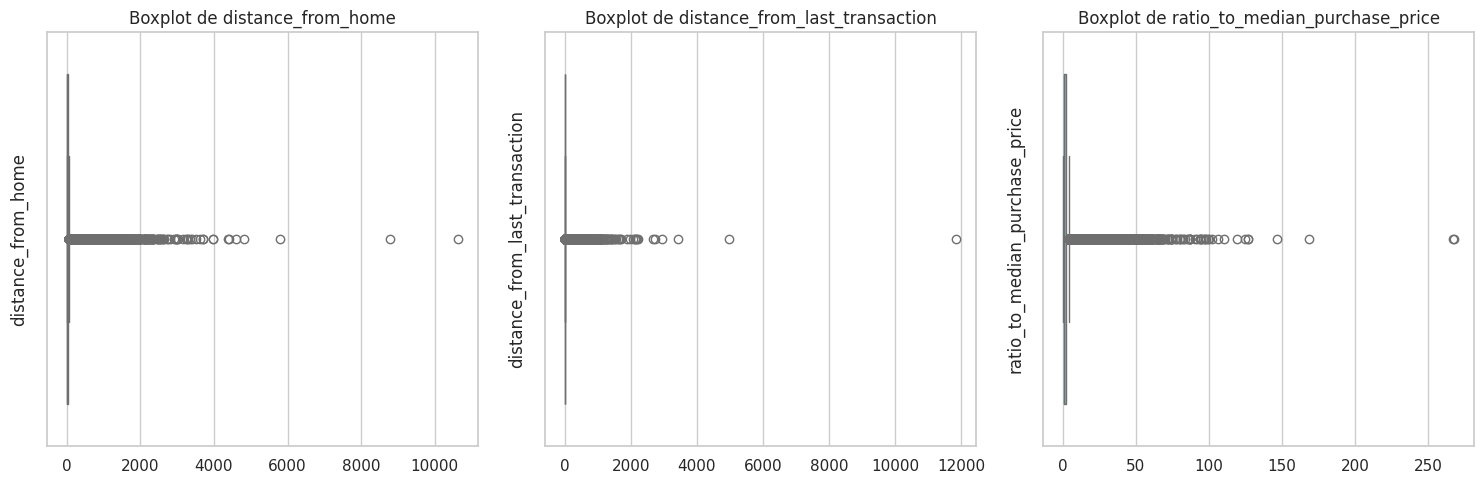

In [46]:
columnas_numericas = dataframe.iloc[:, :3]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, columna in enumerate(columnas_numericas.columns):
    sns.boxplot(x=columnas_numericas[columna], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

Eliminación de datos atipicos definiendo un umbral z=3 lo que representa bajo el supuesto de distirbución normal estándar el 99.7% de los datos

In [56]:
umbral_zscore = 3
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
filas_outliers = (abs(z_scores) > umbral_zscore).any(axis=1)

# Eliminar filas con outliers
dataframe_sin_outliers = df[~filas_outliers]

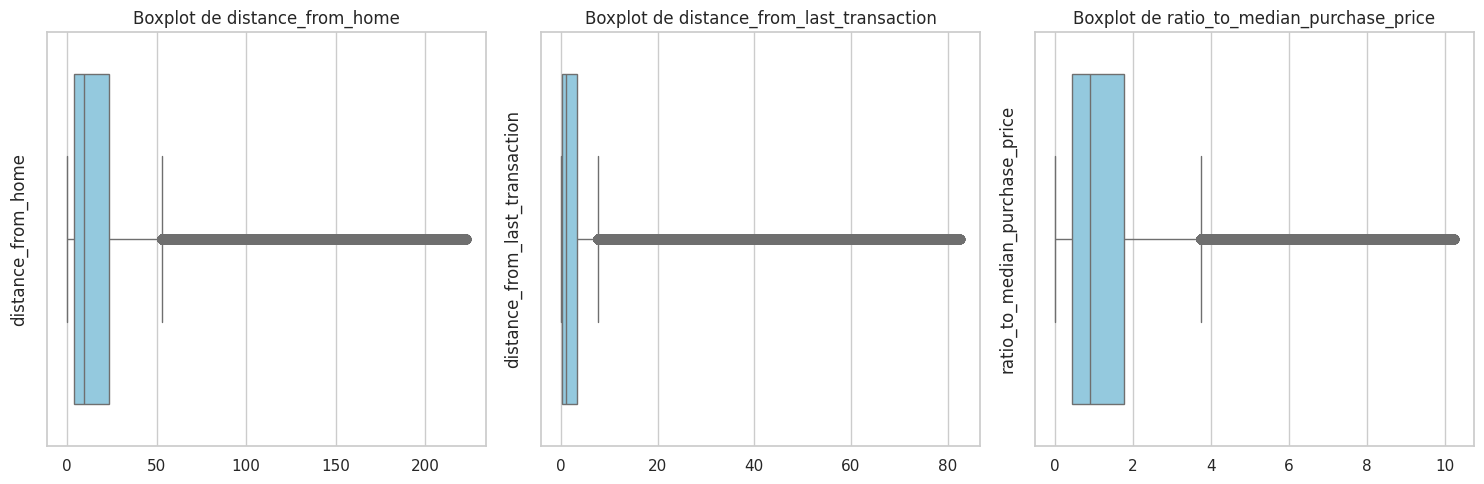

In [57]:
columnas_numericas = dataframe_sin_outliers.iloc[:, :3]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, columna in enumerate(columnas_numericas.columns):
    sns.boxplot(x=columnas_numericas[columna], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

In [48]:
matriz_correlacion = df.corr()

matriz_correlacion

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000
